In [1]:
import json
import pandas as pd
import seaborn as sns
from os import listdir
import matplotlib.pyplot as plt
from collections import Counter


## ABRIR O ULTIMO DB

lotofacil_db_dir = './db/lotofacil/'
dbs = listdir(lotofacil_db_dir)
filename = lotofacil_db_dir+dbs[-1]
with open(filename, 'r') as openfile: 
    db = json.load(openfile)

In [2]:
# O formato da chave é "Concurso NNNN (dd/mm/aaaa)"
def find_concurso(dica, db):
    found_key = []
    for key in db.keys():
        if str(dica) in key:
            found_key.append(key)
    if found_key == []:
        found_key = "Concurso não encontrado."
    return found_key

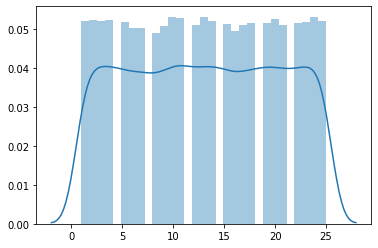

In [3]:
historico = []
for item in db:
    nums = db[item]['Numeros']
    for num in nums:
        historico.append(num)


historico = pd.Series(historico)

sns.distplot(historico)
plt.show()

#### Após analisar o histórico completo, optei por analisar apenas os 100 últimos jogos.

In [4]:
concursos = []
for i in range(100):
    concursos.append(find_concurso(1965-i, db)[0])

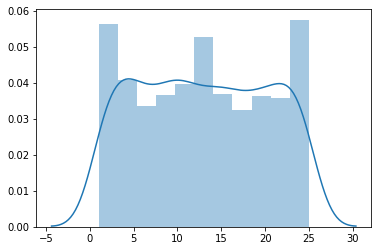

In [5]:
historico = []

for item in concursos:
    nums = db[item]['Numeros']
    for num in nums:
        historico.append(num)

historico = pd.Series(historico)

sns.distplot(historico)

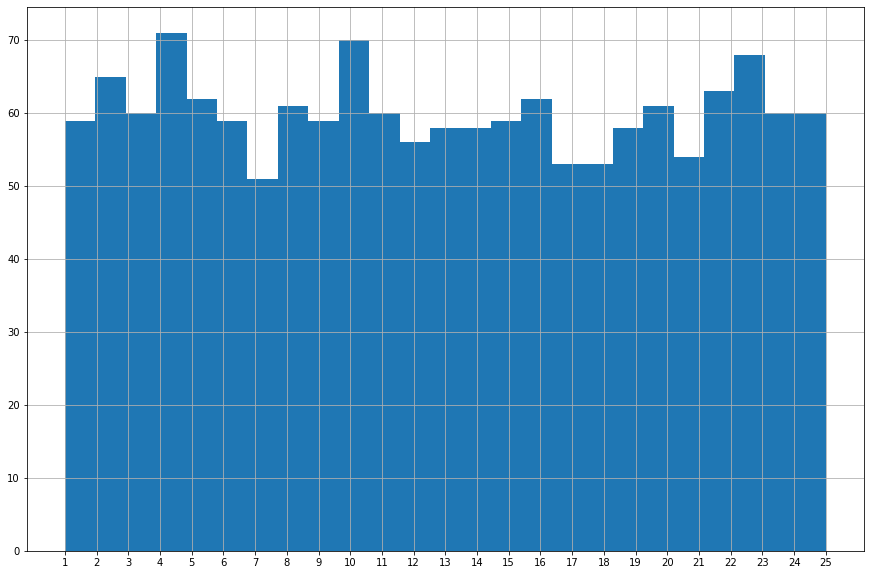

In [6]:
ticks = []
[ticks.append(i) for i in range(1,26)]

plt.figure(figsize=(15,10))
historico.hist(bins=25)
plt.xticks(ticks)

plt.show()

In [7]:
ocorrencias = Counter(historico)

#### Pares de (número, ocorrências) nos 100 últimos jogos.

In [8]:
ocorrencias.most_common()

[(4, 71),
 (10, 70),
 (23, 68),
 (2, 65),
 (22, 63),
 (5, 62),
 (16, 62),
 (20, 61),
 (8, 61),
 (24, 60),
 (25, 60),
 (3, 60),
 (11, 60),
 (1, 59),
 (6, 59),
 (9, 59),
 (15, 59),
 (19, 58),
 (13, 58),
 (14, 58),
 (12, 56),
 (21, 54),
 (17, 53),
 (18, 53),
 (7, 51)]

#### Números considerados mais "quentes" são os com maior ocorrência nos últimos jogos.

In [9]:
ocorrencias.most_common(10)

[(4, 71),
 (10, 70),
 (23, 68),
 (2, 65),
 (22, 63),
 (5, 62),
 (16, 62),
 (20, 61),
 (8, 61),
 (24, 60)]

#### Números considerados mais "frios" são os com menor ocorrência nos últimos jogos.

In [10]:
ocorrencias.most_common()[:-10-1:-1]

[(7, 51),
 (18, 53),
 (17, 53),
 (21, 54),
 (12, 56),
 (14, 58),
 (13, 58),
 (19, 58),
 (15, 59),
 (9, 59)]